# INTRODUCTION

In Today's world Data is every where and there is soo much data availble nowdays. Data can be collected from various sources like application, websites and books etc.
Data can be any formate it may in Integers or Objects or may in Time formate. But machine can understand only numaric data so EDA process helps to handle this type of data and noicy data. It also helps to gain information form the data.

# EDA and Importance of EDA

EDA stands for Exploratory Data Analysis. As per my experiance in any machine learning problems there is no such ruled based solutions. Its all about how we analyse and understand the data. EDA Process helps to anaylys and understand data clearly. And there is no short cuts to solve the problem and generating the model. EDA is one of most important step to solve Machine learning problems. 

EDA has several Processes:

1. Handeling Missing Values
2. Handeling Text data
3. Handeling Categorical data.
4. Handeling Outliers.
5. Handeling Duplicate records.

Before ongoing EDA steps firstly we need to understand the problem statement clearly.

# Understanding the Problem statement

The first step of any machine learnig projects is to understand the problem statement. Here i have took one data set from online. Problem statement is like. We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. Data have important details about a doctor and we need to predict the doctor’s consulting fees.

The Dataset having 5961 records and each containing doctor's Qualification, Experience, Rating, Profile,Miscellaeous_Info,
Place, and Fees.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

### Loading Dataset

In [2]:
df = pd.read_excel("/home/pavankumar/data_sci_dec/datasets/Doctor_fee_consultation/Final_Train.xlsx")

### Basic Data Exploration
In this step we perform some basic steps to check what data tells us and to get information.

Basic operations are: 
1. Head of data
2. Shape of Data
3. Information of the data
4. Description of data
5. Counts of null values and representing in graphical

Lets Start analysing and exploring on the data...

1.Head fucntion gives first 5 rows from the dataset by default. So we can see what type of data and columns are available

In [3]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


2.Shape of Data is nothing but it gives length and breadth of data i.e number of rows and columns

In [4]:
df.shape

(5961, 7)

3.info() tells us standard information obout the data like column names with count of non null values and type of column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


4.Describe fucntion shows the statistical information of numerical data. And it helps to see how data is spread max value, minimum value and different percentiles.

In [6]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


5.isnull() function helps to see the null values in the dataset. Heatmap give much clear visual understand where null values are present.

In [7]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

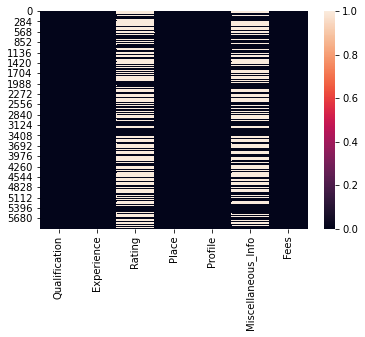

In [8]:
sns.heatmap(df.isnull())

Heatmap is showing how much number of null values present in each column. From above we can see that Rating and Misscellaneous_Info having large number of null values. Places column having only 25 null values.

Let's drop these columns which having null values more than 60% and preoceed further analysing.

In [9]:
df.drop(['Rating','Miscellaneous_Info'],axis=1, inplace=True)

### Handeling Missing value

Imputing and handeling missing values are one of important step in any machine learning problems.

It can be done by using several methods depends how we are analysing the data.
Null values can be filled by mean meadian and mode of the data and by using external libraries like KNNImputer.

Mean will you use when data in numerics and continues form.
Mode is in used in categorical data

KNNImputer i tooks N numbers of points and mean that points and fill the null values row by row.

In [10]:
print('Number of Null value in Place :', df['Place'].isnull().sum())
df[(df['Profile']=='Dermatologists') & (df['Experience']=='0 years experience') & (pd.isnull(df['Place']))]
print('Length of this table : ',len(df[(df['Profile']=='Dermatologists') & (df['Experience']=='0 years experience') & (pd.isnull(df['Place']))]))

Number of Null value in Place : 25
Length of this table :  24


Above table shows that 99 % of null values are present in Place column when Qualification is 'Get inspired by remarkable stories of people l...' and Experiance is  '0 years experiance'.

Rather loosing the data or dropping this null values. Imputing some values at places of missing values.

Before imputing the null values let we handle Duplicated values

### Handeling Duplicated values

In [11]:
duplicated=df.duplicated()
print('Number of duplicates are : ',duplicated.sum())
df[duplicated]

Number of duplicates are :  65


,Qualification,Experience,Place,Profile,Fees
474,BHMS,3 years experience,"Malleswaram, Bangalore",Homeopath,100
502,Get inspired by remarkable stories of people l...,0 years experience,NaN,Dermatologists,100
599,Get inspired by remarkable stories of people l...,0 years experience,NaN,Dermatologists,100
605,Get inspired by remarkable stories of people l...,0 years experience,NaN,Dermatologists,100
700,BDS,12 years experience,"Thiruvanmiyur, Chennai",Dentist,200
...,...,...,...,...,...
5723,Get inspired by remarkable stories of people l...,0 years experience,NaN,Dermatologists,100
5747,BDS,11 years experience,"Ganapathy, Coimbatore",Dentist,100
5765,BDS,2 years experience,"Guduvanchery, Chennai",Dentist,100
5883,BDS,10 years experience,"Katwaria Sarai, Delhi",Dentist,200


Out of 5961 rows having 65 rows are duplicated. We'll drop duplicated rows so that data we can get only distinct records. 

In [12]:
df.drop_duplicates(inplace=True)

Let's see dupliated rows are removed or not

In [13]:
print('Number of duplicated rows are : ',df.duplicated().sum())

Number of duplicated rows are :  0


Let's see after dropping duplicates it is affecting on null values or not.

In [14]:
df['Place'].isnull().sum()

2

It means most of the null values are dropped during dropping duplicates.

Filling null values with  some other value.

In [15]:
df.fillna('OTHER',axis=0,inplace=True)

### Handeling Object Columns

In [16]:
df.select_dtypes('object').columns # These are the object columns to handle

Index(['Qualification', 'Experience', 'Place', 'Profile'], dtype='object')

Experiance column is in Object type like('3 years experience') only we need number data soo we can split and add integer value in Experiance column

In [17]:
for i in df['Experience'].index:
    df['Experience'][i]=df['Experience'][i].split(' ')[0]
df['Experience']=df['Experience'].astype('int')
df['Experience']

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5896, dtype: int64

As we can see Qualification and Places having multiple Qualification and multiple place in some of rows.
Let's split and handle these two columns

In [18]:
maxim = 1
for i in df['Place'] :
    try:
        if len(i.split(',')) > maxim:
             maxim = len(i.split(','))
    except:
        pass
print("\n\nMaximum Title in a Cell : ", maxim)  



Maximum Title in a Cell :  3


In [19]:
maxim = 1
for i in df['Qualification'] :
    try:
        if len(i.split(',')) > maxim:
             maxim = len(i.split(','))
    except:
        pass
print("\n\nMaximum Title in a Cell : ", maxim)  



Maximum Title in a Cell :  10


In [20]:
q1=[]
q2=[]
q3=[]
q4=[]
q5=[]
q6=[]
q7=[]
q8=[]
q9=[]
q10=[]

for i in df['Qualification'] :
    try:
        q1.append(i.split(',')[0])
    except:
        q1.append('NONE')
    try:
        q2.append(i.split(',')[1])
    except:
        q2.append('NONE')
    try:
        q3.append(i.split(',')[2])
    except:
        q3.append('NONE')
    try:
        q4.append(i.split(',')[3])
    except:
        q4.append('NONE')
    try:
        q5.append(i.split(',')[4])
    except:
        q5.append('NONE')
    try:
        q6.append(i.split(',')[5])
    except:
        q6.append('NONE')
    try:
        q7.append(i.split(',')[6])
    except:
        q7.append('NONE')
    try:
        q8.append(i.split(',')[7])
    except:
        q8.append('NONE')
    try:
        q9.append(i.split(',')[8])
    except:
        q9.append('NONE')
    try:
        q10.append(i.split(',')[9])
    except:
        q10.append('NONE')
df['Qualification1']=q1
df['Qualification2']=q2
df['Qualification3']=q3
df['Qualification4']=q4
df['Qualification5']=q5
df['Qualification6']=q6
df['Qualification7']=q7
df['Qualification8']=q8
df['Qualification9']=q9
df['Qualification10']=q10
df.drop('Qualification',axis=1,inplace=True)

In [21]:
pl1=[]
pl2=[]
pl3=[]
for i in df['Place'] :
    try:
        pl1.append(i.split(',')[0])
    except:
        pl1.append('NONE')
    try:
        pl2.append(i.split(',')[1])
    except:
        pl2.append('NONE')
    try:
        pl3.append(i.split(',')[2])
    except:
        pl3.append('NONE')
df['Place1']=pl1
df['Place2']=pl2
df['Place3']=pl3
df.drop('Place',axis=1,inplace=True)

### Lable Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
for i in df.select_dtypes('object').columns:
    df[i]=le.fit_transform(df[i])
df.head()

,Experience,Profile,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Place1,Place2,Place3
0,24,5,100,8,252,405,209,95,31,12,6,4,1,296,4,1
1,12,0,350,5,241,405,209,95,31,12,6,4,1,856,0,1
2,9,3,300,79,334,405,209,95,31,12,6,4,1,452,0,1
3,12,0,250,12,7,405,209,95,31,12,6,4,1,68,0,1
4,20,0,250,5,425,405,209,95,31,12,6,4,1,335,1,1


### Handeling Skewness

Any continuess data it should be normally distributed for better prediction. When most of the point lied in some range and some less points are lied in another range at this situation skewness occure it may be right skewed or left skewed.

Right Skew is  present in this formate = Mode > Median > Mean

Left Skew is  present in this formate = Mode < Median < Mean

Skeness can be removed by various methods like

1. Log Transformation
2. Square Root Transformation
3. Power Transformation

Note : Skewness is acceptable when it close to 0.5

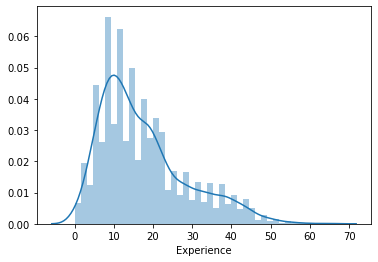

skewness is :  0.9983274046961402


In [24]:
sns.distplot(df['Experience'])
plt.show()
print('skewness is : ',df['Experience'].skew())

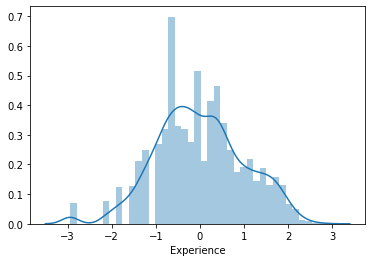

Afte applying Power Transformation then skewness is :  -0.0008536299496319324


In [25]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df['Experience']=pt.fit_transform(pd.DataFrame(df['Experience']))
sns.distplot(df['Experience'])
plt.show()
print('Afte applying Power Transformation then skewness is : ',df['Experience'].skew())

###  Outliers

Outliers are those points who has extintly heigh values from the rest of the values.

There are different types of outliers like 
1. Intensional outlier : Intensionaly user has enter extream value
2. Typo Error : Wrongly enter while typing
3. Legit outliers : Some values are really extream compare to rest of points e.g Salary of COA

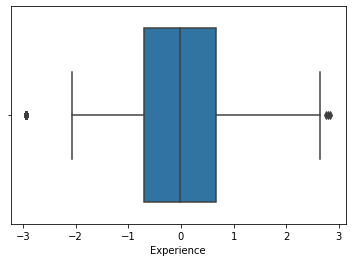

In [26]:
sns.boxplot(df['Experience'])

### Normalizing and Scaling 

Scalling is used when data columns different different ranage like suppose one column represents salary which contain large digit and another having age which have only 2-3 digit. There may be a chances of biasing between these two columns while model generation. To handel this Scaling or normalizing is much more important.

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_new=ss.fit_transform(df)

In [28]:
df=pd.DataFrame(df_new,columns=df.columns)
df.head()

,Experience,Profile,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Place1,Place2,Place3
0,0.736701,1.537842,-1.095544,-1.017214,-0.262797,0.435934,0.219496,0.120041,0.065795,0.039875,0.028681,0.023784,0.013024,-0.451102,0.398745,0.013024
1,-0.337096,-1.474689,0.213275,-1.093324,-0.346484,0.435934,0.219496,0.120041,0.065795,0.039875,0.028681,0.023784,0.013024,1.739565,-1.322969,0.013024
2,-0.709616,0.332830,-0.048488,0.784056,0.361050,0.435934,0.219496,0.120041,0.065795,0.039875,0.028681,0.023784,0.013024,0.159155,-1.322969,0.013024
3,-0.337096,-1.474689,-0.310252,-0.915734,-2.126730,0.435934,0.219496,0.120041,0.065795,0.039875,0.028681,0.023784,0.013024,-1.343016,-1.322969,0.013024
4,0.428503,-1.474689,-0.310252,-1.093324,1.053367,0.435934,0.219496,0.120041,0.065795,0.039875,0.028681,0.023784,0.013024,-0.298538,-0.892540,0.013024


### Correlation

Correlation shows that each column how much correlating with rest of the columns.
There are two type of correlation positive correlation and negative correlation

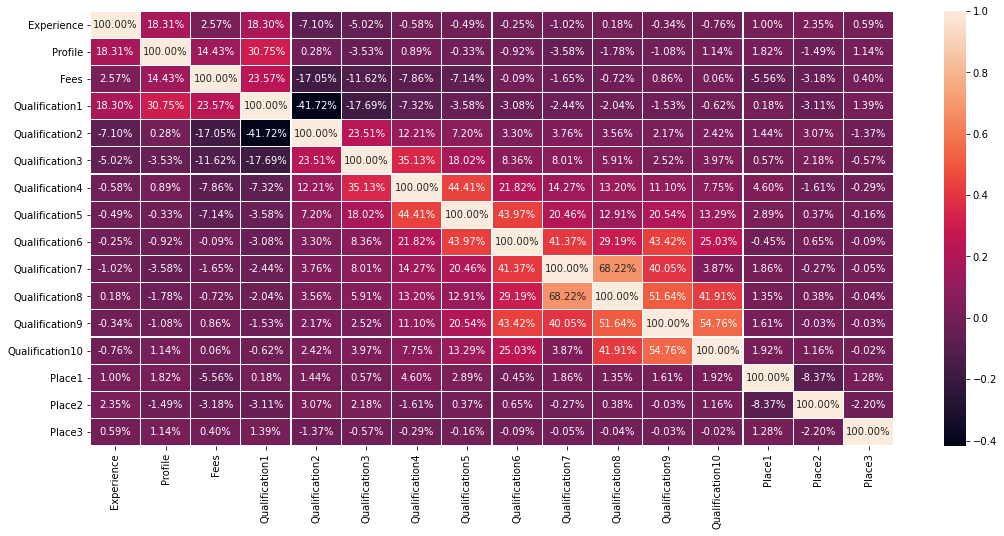

In [32]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,fmt='0.2%',linewidths=0.2)

### Conclusion

Data has cleaned by using some EDA processes. Now data has converted noicy object data to clean numeric data. So we can apply machine algorithms to predict doctor consultant fees.